### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set and on for every next 7 days)
### Total infected cases, total fatalities, total recovered

In [1]:
from covid import *
%matplotlib inline

Start importing files in folder
None
None
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
None
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

343

In [7]:
updated_date=files[-1].split('.')[0]
updated_date

'12-29-2020'

### Total CONFIRMED cases in the World changed by week


Week: 1 with lowest confirmed cases 2118

Week: 47 with highest confirmed cases 5186742

Average confirmed by Week until now:  1639019.02


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Confirmed changed by Week,2118,16787,40151,71226,78985,88368,109820,167411,337852,719966,...,46614572,50549088,54596104,58757253,62842162,67158936,72345678,76832527,80797122,81950951
Number of Confirmed every Week,2118,14669,23364,31075,7759,9383,21452,57591,170441,382114,...,3488051,3934516,4047016,4161149,4084909,4316774,5186742,4486849,3964595,1153829


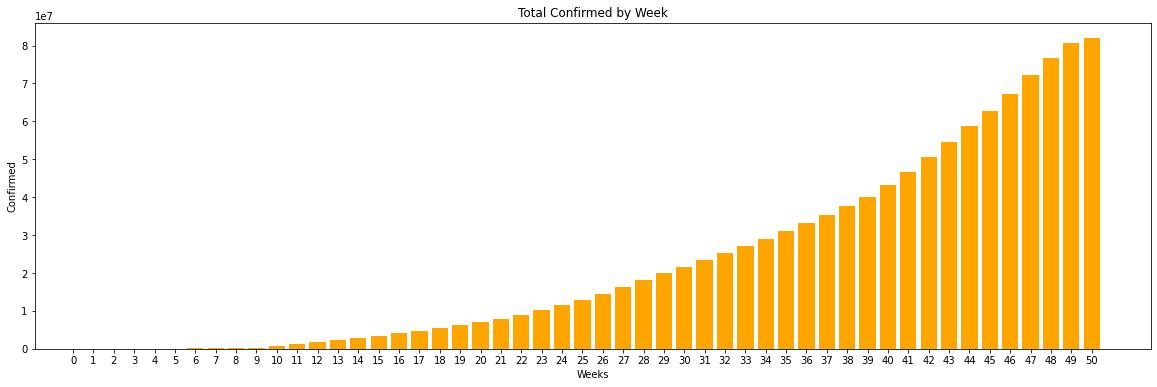

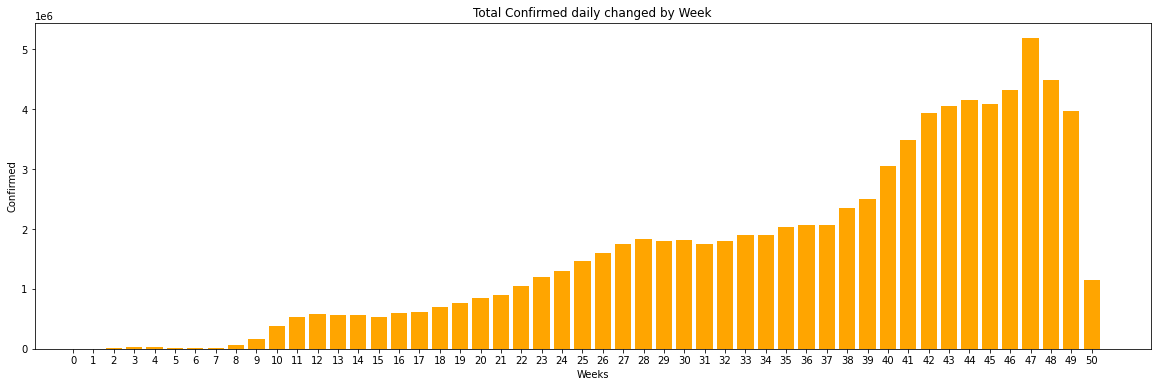

In [4]:
# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week")
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 1 with lowest Fatalities cases 56.0

Week: 48 with highest Fatalities cases 80718

Average Fatalities by Week until now:  35798.16


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Fatalities changed by Week,56.0,362.0,906,1770,2469,2996,3803,6440,14623,33924,...,1201103,1257430,1319790,1388685,1459909,1536100,1612487,1693205,1764955,1789908
Number of Fatalities every Week,56.0,306.0,544,864,699,527,807,2637,8183,19301,...,46212,56327,62360,68895,71224,76191,76387,80718,71750,24953


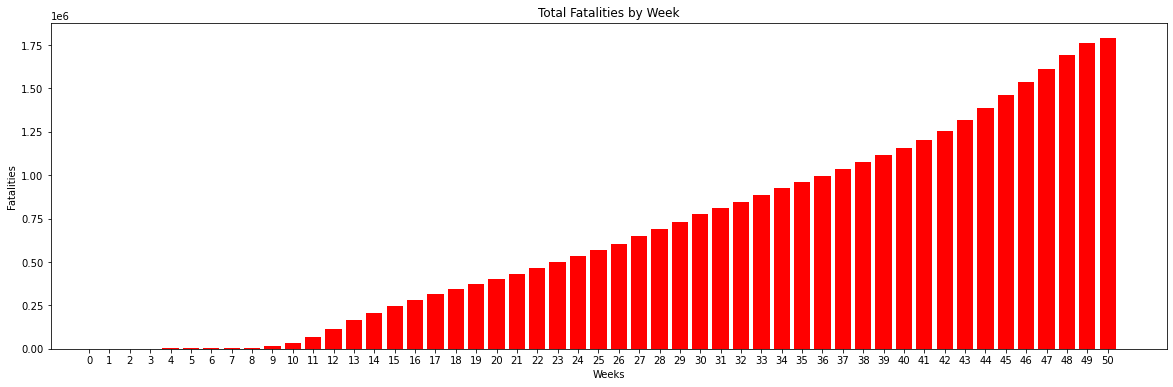

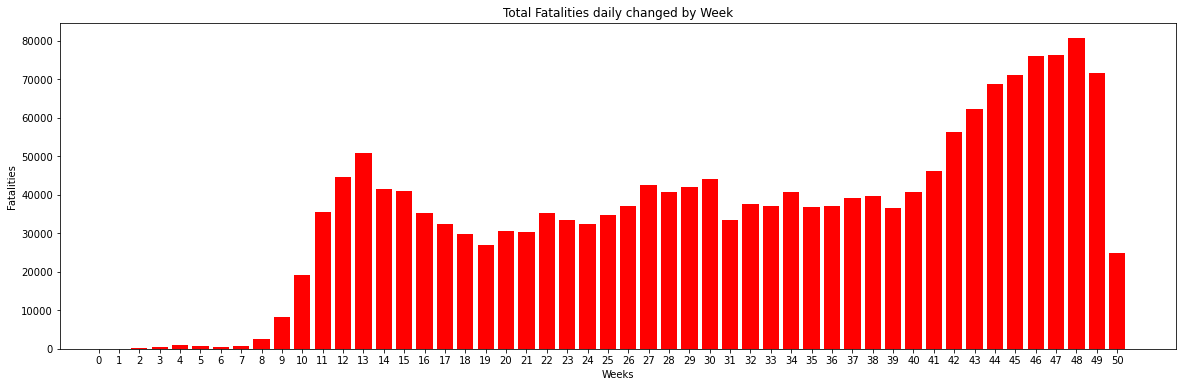

In [5]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week


Week: 1 with lowest Recovered cases 52.0

Week: 47 with highest Recovered cases 4145513.0

Average Recovered by Week until now:  1081018.9


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Recovered changed by Week,52.0,472.0,3244,10865,23394,42715,60693,76031,97225,149049,...,31105308.0,33060197.0,35000108.0,37516157.0,40157958.0,43174509.0,47320022.0,50302328.0,53228498.0,54050945.0
Number of Recovered every Week,52.0,420.0,2772,7621,12529,19321,17978,15338,21194,51824,...,2108565.0,1954889.0,1939911.0,2516049.0,2641801.0,3016551.0,4145513.0,2982306.0,2926170.0,822447.0


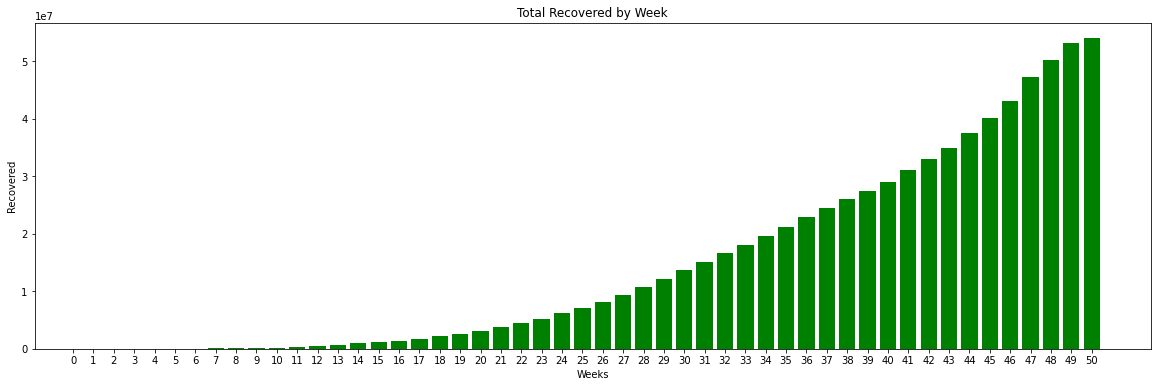

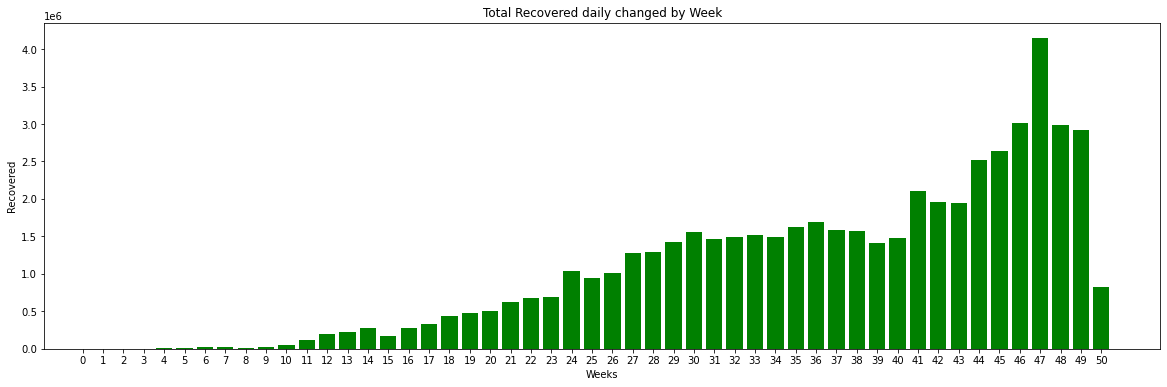

In [6]:
# convert to DataFrame
x_weeks = [week for week, value in recoveredByWeek]
y_cases_total_recovered = [value for week, value in recoveredByWeek]
y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
for week in weeks:
    confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# Plot total recovered
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week")
plt.savefig('output/week_totalrecovered.jpg')

# Plot number of recovered every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered daily changed by Week")
plt.savefig('output/week_totalrecovered_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
confirmedweeks_recovered

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1